# 16_dive to cnn

# MNIST using CNN

In [20]:
import tensorflow as tf
import tensorflow.keras

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
X_train, X_test = x_train/255, x_test/255

X_train = X_train.reshape((60000, 28, 28, 1))
                                        # cnn 이기 때문에 1을 마지막에 붙여줘야 한다.
X_test = X_test.reshape((10000, 28, 28, 1))

In [21]:
# 구조
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(3, kernel_size=(3,3), strides=(1,1), 
                # 3 : 채널 수를 의미 , 3채널
                padding='same', activation='relu',
                input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 3)         30        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 3)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 3)         0         
                                                                 
 flatten_1 (Flatten)         (None, 588)               0         
                                                                 
 dense_2 (Dense)             (None, 1000)              589000    
                                                                 
 dense_3 (Dense)             (None, 10)                10010     
                                                      

In [23]:
model.layers

In [24]:
# 아직 학습하지 않은 conv 레이어의 웨이트의 평균
conv = model.layers[0]
conv_weights = conv.weights[0].numpy()
conv_weights.mean(), conv_weights.std()

(-0.0032225715, 0.23870517)

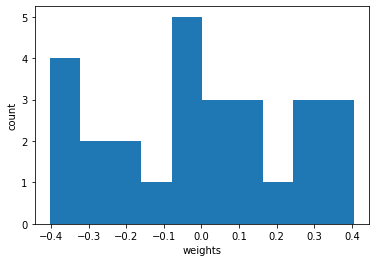

In [25]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weights')
plt.ylabel('count')
plt.show()

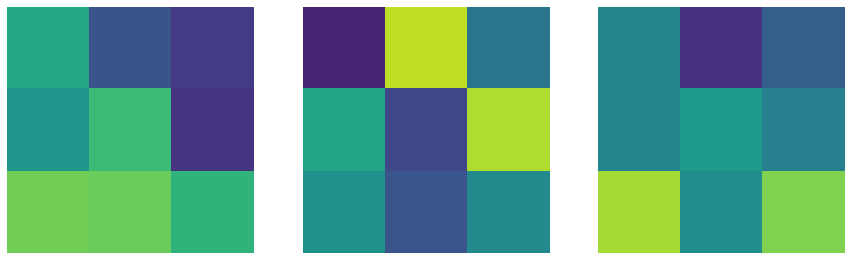

In [26]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
for i in range(3):
    ax[i].imshow(conv_weights[:,:,0,i], vmin=-0.5, vmax=0.5)
    ax[i].axis('off')

plt.show()

In [27]:
%%time
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data = (X_test, y_test))

Epoch 1/5
   8/1875 [..............................] - ETA: 14s - loss: 2.0883 - accuracy: 0.3125  

2022-06-09 21:49:10.331313: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1872/1875 [============================>.] - ETA: 0s - loss: 0.2220 - accuracy: 0.9337

2022-06-09 21:49:26.836599: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 9ms/step - loss: 0.2219 - accuracy: 0.9337 - val_loss: 0.0953 - val_accuracy: 0.9714
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0926 - accuracy: 0.9710 - val_loss: 0.0704 - val_accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0670 - accuracy: 0.9787 - val_loss: 0.0613 - val_accuracy: 0.9806
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0551 - accuracy: 0.9822 - val_loss: 0.0578 - val_accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0445 - accuracy: 0.9850 - val_loss: 0.0479 - val_accuracy: 0.9856
CPU times: user 56.1 s, sys: 38.3 s, total: 1min 34s
Wall time: 1min 23s


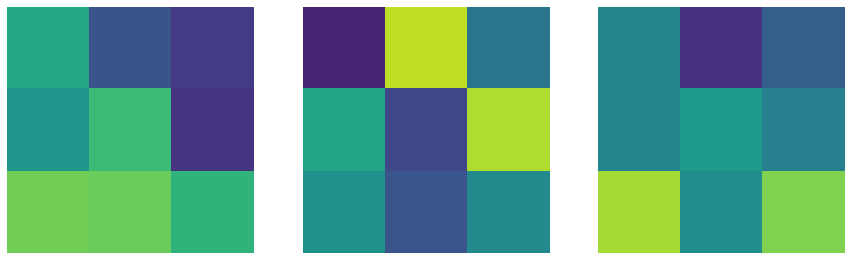

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for i in range(3):
    ax[i].imshow(conv_weights[:, :, 0, i], vmin=-0.5, vmax=0.5)
    ax[i].axis('off')

plt.show()

In [29]:
inputs = X_train[0].reshape(-1, 28, 28, 1)
conv_layer_output = tf.keras.Model(model.input, model.layers[0].output)
conv_layer_output.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 3)         30        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 입력에 대한 feature map을 뽑기
feature_maps = conv_layer_output.predict(inputs)
feature_maps.shape

2022-06-09 21:50:33.517450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(1, 28, 28, 3)

In [31]:
feature_maps[0,:,:,0].shape

(28, 28)

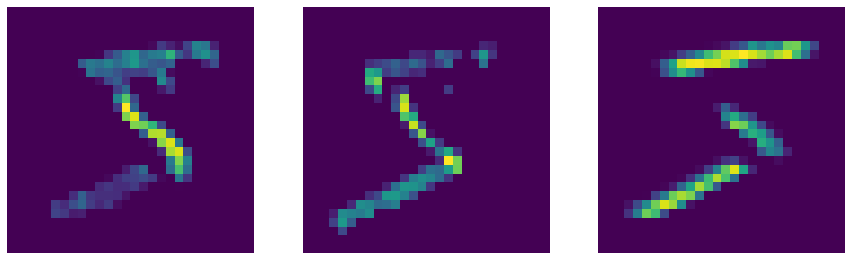

In [32]:
# feature map 이 본 숫자 5
fig, ax = plt.subplots(1,3,figsize=(15,5))
for i in range(3):
    ax[i].imshow(feature_maps[0, :, :, i])
    ax[i].axis('off')

plt.show()

In [33]:
# 방금 전 과정을 함수로 만들기
def draw_feature_maps(n):
    inputs = X_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)

    fig, ax = plt.subplots(1, 4, figsize=(15,5))

    ax[0].imshow(inputs[0, :, :, 0], cmap='gray');      # 원본 입력 사진
    for i in range(1,4):            # predict 사진
        ax[i].imshow(feature_maps[0, :, :, i-1])
        ax[i].axis('off')

    plt.show()

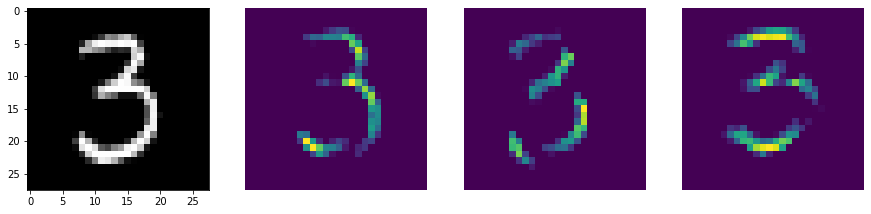

In [34]:
draw_feature_maps(50)

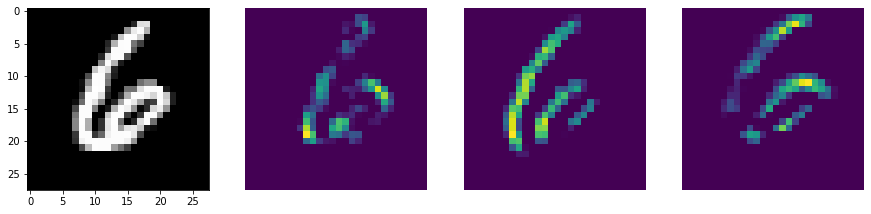

In [35]:
draw_feature_maps(13)

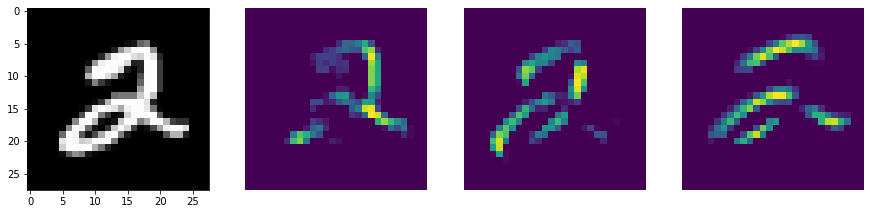

In [36]:
draw_feature_maps(5)

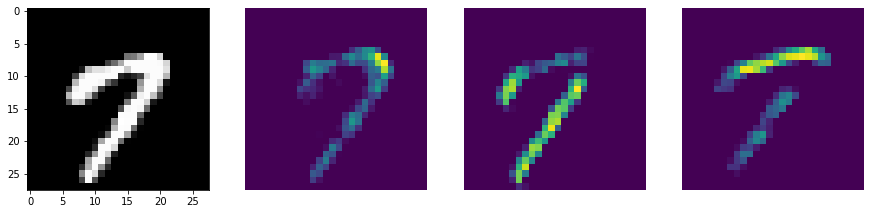

In [37]:
draw_feature_maps(15)

> ## 진한 색상을 띄는 곳 : convolution filter가 강조하여 살펴보는 곳을 의미한다.

--------------------

In [39]:
# 모델 채널 증가해보기
model1 = models.Sequential([
    layers.Conv2D(8, kernel_size=(3,3), strides=(1,1), padding='same',
                # 이전에는 3*3채널이었지만 이번에는 8*8 채널
                activation = 'relu', input_shape=(28,28,1)),
    layers.MaxPool2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [40]:
%%time
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs = 5, verbose= 1,
                validation_data=(X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0392 - accuracy: 0.9867 - val_loss: 0.0595 - val_accuracy: 0.9809
Epoch 2/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0339 - accuracy: 0.9891 - val_loss: 0.0474 - val_accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0296 - accuracy: 0.9902 - val_loss: 0.0498 - val_accuracy: 0.9854
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0269 - accuracy: 0.9908 - val_loss: 0.0466 - val_accuracy: 0.9861
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0503 - val_accuracy: 0.9862
CPU times: user 49.5 s, sys: 33.1 s, total: 1min 22s
Wall time: 1min 18s


In [41]:
conv_layer_output = tf.keras.Model(model1.input, model1.layers[0].output)

def draw_feature_maps(n):
    inputs = X_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)

    fig, ax = plt.subplots(1, 9, figsize= (15,5))

    ax[0].imshow(inputs[0, :, :, 0], cmap='gray');
    for i in range(1, 9):
        ax[i].imshow(feature_maps[0, :, :, i-1])
        ax[i].axis('off')

    plt.show()

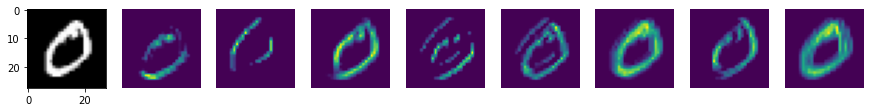

In [43]:
draw_feature_maps(1)

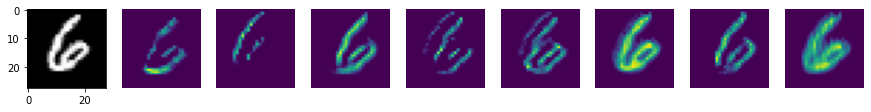

In [44]:
draw_feature_maps(13)

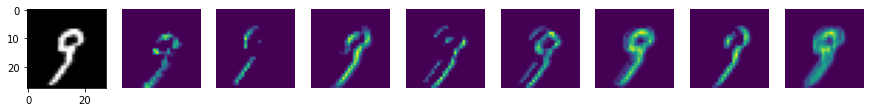

In [45]:
draw_feature_maps(19)

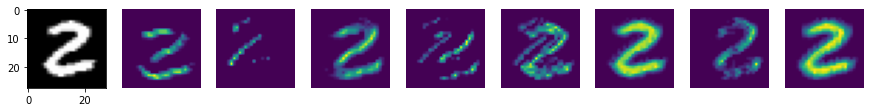

In [46]:
draw_feature_maps(25)